In [9]:
import numpy as np
import pandas as pd
import scipy.stats

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
data = pd.read_csv('./data/provData/x_train.csv').set_index('Provider')
#data_test = pd.read_csv('./data/provData/x_test_inout.csv').set_index('Provider')

In [44]:
data.drop(columns = ['Unnamed: 0','Unnamed: 0.1'], inplace=True)

In [45]:
data.isna().sum()

Age                             0
Gender                          0
BeneID                          0
ClaimID                         0
State                           0
AttendingPhysician              0
OperatingPhysician              0
OtherPhysician                  0
NumProc                         0
NumDiag                         0
NumChronics                     0
InscClaimAmtReimbursed          0
DeductibleAmtPaid               1
ClaimDays                       0
WhetherDead                     0
Alzheimer                       0
HeartFailure                    0
KidneyDisease                   0
Cancer                          0
ObstrPulmonary                  0
Depression                      0
Diabetes                        0
IschemicHeart                   0
Osteoporasis                    0
RheumatoidArthritis             0
Stroke                          0
logClaim                        0
logBene                         0
Age_Range                       0
NumProc_Range 

In [46]:
data.fillna(0, inplace=True)

In [162]:
Data = data.reset_index().reset_index()

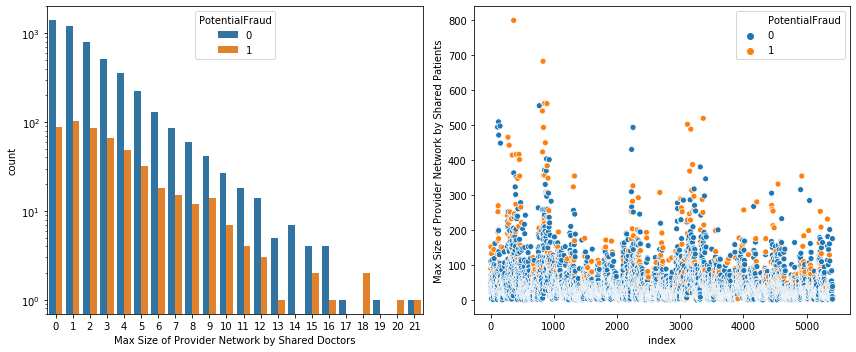

In [165]:
plt.figure(figsize=(12,5))

ax1 = plt.subplot(121)


ax1 = sns.countplot(x = 'docNet_max', hue = 'PotentialFraud', data=Data)
ax1.set(yscale="log")
ax1.set(xlabel='Max Size of Provider Network by Shared Doctors')
plt.tight_layout()
#plt.xlim(0,9000)
#plt.annotate('Fraud: ?', (1000.6, 105))


ax2 = plt.subplot(122)
ax2 = sns.scatterplot(x='index', y='patNet_max', hue='PotentialFraud', data=Data)

ax2.set(ylabel='Max Size of Provider Network by Shared Patients')
plt.tight_layout()
#plt.xlim(0,9000)
#plt.annotate('Fraud: ?', (1000.6, 105))

In [101]:
#x_train = x_train.drop(columns = 'PotentialFraud')
y = data['PotentialFraud']
x = data.drop(columns = ['PotentialFraud'])

In [102]:
x.drop(columns = ['patNet_min','patNet_mean','docNet_min','docNet_mean'], inplace=True)

In [98]:
x

,Age,Gender,BeneID,ClaimID,State,AttendingPhysician,OperatingPhysician,OtherPhysician,NumProc,NumDiag,...,NumChronics_Range,InscClaimAmtReimbursed_Range,ClaimDays_Range,BeneID_in,BeneID_out,ClaimID_in,ClaimID_out,Doctors,docNet_max,patNet_max
Provider,,,,,,,,,,,,,,,,,,,,,
PRV51001,78.120000,0.360000,24,25,1,14,5,8,0.120000,3.640000,...,9,41990,14,5.0,19.0,5.0,20.0,19,4,46
PRV51003,69.553030,0.409091,117,132,3,44,7,22,0.363636,5.840909,...,10,57000,27,53.0,66.0,62.0,70.0,51,1,89
PRV51004,71.731544,0.308725,138,149,9,38,19,26,0.000000,2.771812,...,9,3300,20,0.0,138.0,0.0,149.0,48,4,110
PRV51005,70.021459,0.438627,495,1165,4,6,6,4,0.000000,2.805150,...,9,4080,20,0.0,495.0,0.0,1165.0,7,0,151
PRV51007,68.763889,0.472222,58,72,2,10,5,7,0.013889,3.222222,...,8,10000,20,3.0,56.0,3.0,69.0,11,3,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PRV57759,73.428571,0.571429,24,28,1,1,1,1,0.000000,2.178571,...,9,3290,20,0.0,24.0,0.0,28.0,1,0,44
PRV57760,60.954545,0.772727,9,22,1,3,2,2,0.000000,2.681818,...,6,1080,7,0.0,9.0,0.0,22.0,3,2,9
PRV57761,71.439024,0.487805,67,82,1,2,5,2,0.000000,2.890244,...,9,2200,20,0.0,67.0,0.0,82.0,7,2,175


In [178]:
from sklearn import linear_model
logit_balanced = linear_model.LogisticRegression(solver = 'lbfgs',class_weight='balanced')
logit = linear_model.LogisticRegression(solver = 'lbfgs')

logit_balanced.fit(x,y)
logit.fit(x,y)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

LogisticRegression()

Get quick look at score for model using whole feature set

In [176]:
print("The accuracy of logistic regression is: " + str(logit.score(x, y)))

The accuracy of logistic regression is: 0.8754158964879852


Not very good since null model would have an accuracy of 91%

## Metrics

### Recall
Recall (or sensitivity or true positive rate) is the fraction of observations having a true class of 1 (potentially fraudulent) that are being correctly classified as such. Recall is exactly how many of the fradulent providers we are actually classifying as fraudulent.

If we have a problem like cancer detection, we would ideally want our system to have very high recall, potentially at the expense of false postives or accuracy in general.

### F1 Score
F1 score is the harmonic mean of recall and precision, and it can be thought of as a balance of the two. While accuracy also serves this purpose, it can be quite misleading if classes are heavily imbalanced. In our case, only 9% of providers have been labeled as fraudulent and we assume the test set follows the same distribution. 

For instance, suppose we have a population of 1000 providers and 100 of them are fraudulent. We have a classfication system that produces the following results:

- 40 True Positive (correctly identified fraud)
- 10 False Positives (incorrectly mistook non-fraud for fraud)
- 20 False Negative (failed to identify fraud)
- 930 True Negatives (correctly identified non-fraud)

In this example, we have 93.0% accuracy while the F1 score is 72.7% (and 80% precision, 67% recall), which seems to be a more useful overall indicator of performance in this case.

### ROC Curve and AUC
The receiver operating characteristic curve (or ROC curve) is another tool for evaluating the classfication performance of different models. For any given model, the ROC curve plots the tradoff between the false positive rate on the x-axis against the true positive rate (aka Precision) for different choices of thresholds for a binary classifier. In one extreme case, if the classification threshold is 0, then all instances (for non-perfect models) will be classified as 0, leading to a false positive rate of 0, but also a true postive rate of 0. In the other extreme case, a threshold of 1 leads to a true positive rate/recall of 1 but also a false postive rate of 1. 

In terms of evaluating classification performance, an ROC curve which is closer to the (FPR = 0, TPR = 1) point compared to another indicates that the former model strictly dominates the latter. Beyond just the curve, one summary measure is simply the AUC or (A)rea (U)nder the ROC (C)urve. A completely random model will produce an AUC of 0.5 while a perfect model will have an AUC of 1.

In [82]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, roc_auc_score

def logitMetrics(x,y, model):
    logit_tr_acc = model.score(x, y)
    logit_tr_pr, logit_tr_re, logit_tr_f1, _ = precision_recall_fscore_support(y, logit.predict(x))

    print(" Logit Train Accuracy : %1.3f" % (logit_tr_acc))
    print(" Logit Train Precision: %1.3f (no fraud) and %1.3f (fraud)" % (logit_tr_pr[0], logit_tr_pr[1]))
    print(" Logit Train Recall   : %1.3f (no fraud) and %1.3f (fraud)" % (logit_tr_re[0], logit_tr_re[1]))
    print(" Logit Train F1 Score : %1.3f (no fraud) and %1.3f (fraud)" % (logit_tr_f1[0], logit_tr_f1[1]))
    
    y_probs_logit = pd.DataFrame(model.predict_proba(x))[1]
    fpr, tpr, thresholds = roc_curve(y, y_probs_logit)
    auc = roc_auc_score(y, y_probs_logit)  # Computes auc
    
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
            label='ROC logit (area = %0.2f)' % auc)

    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0, 1.02])
    plt.ylim([0, 1.02])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

 Logit Train Accuracy : 0.935
 Logit Train Precision: 0.949 (no fraud) and 0.731 (fraud)
 Logit Train Recall   : 0.982 (no fraud) and 0.484 (fraud)
 Logit Train F1 Score : 0.965 (no fraud) and 0.583 (fraud)


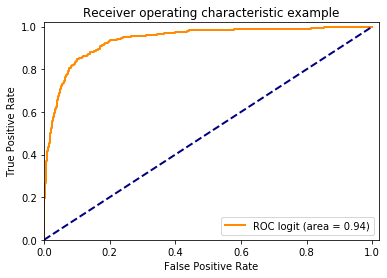

 Logit Train Accuracy : 0.875
 Logit Train Precision: 0.949 (no fraud) and 0.731 (fraud)
 Logit Train Recall   : 0.982 (no fraud) and 0.484 (fraud)
 Logit Train F1 Score : 0.965 (no fraud) and 0.583 (fraud)


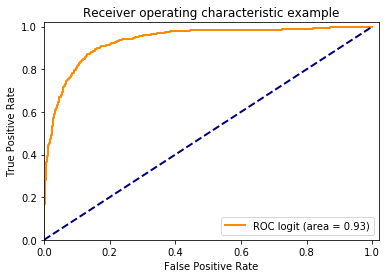

In [179]:
logitMetrics(x,y,logit)
logitMetrics(x,y,logit_balanced)


 Logit Train Accuracy : 0.942
 Logit Train Precision: 0.949 (no fraud) and 0.731 (fraud)
 Logit Train Recall   : 0.982 (no fraud) and 0.484 (fraud)
 Logit Train F1 Score : 0.965 (no fraud) and 0.583 (fraud)


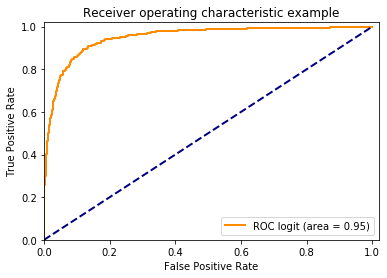

In [84]:
logit2 = linear_model.LogisticRegression(penalty='l1',
                                            solver = 'liblinear', max_iter=1000)
logit2.fit(x,y)
logitMetrics(x,y,logit2)

In [70]:
x

,Age,Gender,BeneID,ClaimID,State,AttendingPhysician,OperatingPhysician,OtherPhysician,NumProc,NumDiag,...,BeneID_out,ClaimID_in,ClaimID_out,Doctors,docNet_max,docNet_min,docNet_mean,patNet_max,patNet_min,patNet_mean
Provider,,,,,,,,,,,,,,,,,,,,,
PRV51001,78.120000,0.360000,24,25,1,14,5,8,0.120000,3.640000,...,19.0,5.0,20.0,19,4,4,4.000000,46,46,46.000000
PRV51003,69.553030,0.409091,117,132,3,44,7,22,0.363636,5.840909,...,66.0,62.0,70.0,51,1,0,0.666667,89,27,54.000000
PRV51004,71.731544,0.308725,138,149,9,38,19,26,0.000000,2.771812,...,138.0,0.0,149.0,48,4,0,0.666667,110,4,32.333333
PRV51005,70.021459,0.438627,495,1165,4,6,6,4,0.000000,2.805150,...,495.0,0.0,1165.0,7,0,0,0.000000,151,4,47.500000
PRV51007,68.763889,0.472222,58,72,2,10,5,7,0.013889,3.222222,...,56.0,3.0,69.0,11,3,0,1.500000,70,9,39.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PRV57759,73.428571,0.571429,24,28,1,1,1,1,0.000000,2.178571,...,24.0,0.0,28.0,1,0,0,0.000000,44,44,44.000000
PRV57760,60.954545,0.772727,9,22,1,3,2,2,0.000000,2.681818,...,9.0,0.0,22.0,3,2,2,2.000000,9,9,9.000000
PRV57761,71.439024,0.487805,67,82,1,2,5,2,0.000000,2.890244,...,67.0,0.0,82.0,7,2,2,2.000000,175,175,175.000000


In [54]:
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
import sklearn.model_selection as ms

In [55]:
ms_10s = ms.StratifiedKFold(n_splits=10)


In [58]:
logit = linear_model.LogisticRegression(solver='liblinear', C=1e4)
scores = ms.cross_val_score(estimator=logit, X=x, y=y, cv=10)

print('Scores: {}'.format(scores))
print('Score mean: {}'.format(scores.mean()))
print('Score std deviation: {}'.format(scores.std()))

Scores: [0.95194085 0.95009242 0.94454713 0.94454713 0.9297597  0.93345656
 0.94639556 0.93160813 0.93715342 0.94454713]
Score mean: 0.9414048059149722
Score std deviation: 0.007442078424841904


In [60]:
# print('Training Error: {}'.format(np.round(np.array(train_error), 4))) # training error
# print('Test Error: {}'.format(np.round(np.array(test_error), 4))) # test error

# ## calculate the mean of the test error
# print('Test Error Mean: {:6f}'.format(np.mean(test_error)))

# ## calculate the standard deviation of the test errors
# print('Test Error SD: {:6f}'.format(np.std(test_error)))

In [89]:
x_train, x_test, y_train, y_test = ms.train_test_split(x,y, 
                                                       test_size=1.0/3, random_state=0)

print('Original: {}, {}'.format(X.shape, y.shape))
print('Training: {}, {}'.format(x_train.shape, y_train.shape))
print('Test:     {}, {}'.format(x_test.shape, y_test.shape))

Original: (5410, 46), (5410,)
Training: (3606, 41), (3606,)
Test:     (1804, 41), (1804,)


Default Parameters for LogisticRegressionCV
- cv = StratifiedKFold

In [121]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits = 10,
                             n_repeats = 3,
                             random_state = 1)

 Logit Train Accuracy : 0.939
 Logit Train Precision: 0.948 (no fraud) and 0.752 (fraud)
 Logit Train Recall   : 0.984 (no fraud) and 0.478 (fraud)
 Logit Train F1 Score : 0.966 (no fraud) and 0.584 (fraud)


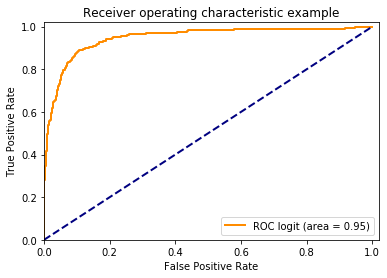

In [122]:
logitcv_f1 = linear_model.LogisticRegressionCV(Cs = 10, # grid regularization
                                               penalty='l1',
                                               scoring = 'f1_weighted',
                                               cv = cv,
                                               solver = 'liblinear',
                                               max_iter=1e5)
logitcv_f1.fit(x_train,y_train)
logitMetrics(x_train,y_train,logitcv_f1)

In [184]:
logitcv_f1.coef_

array([[-5.93728426e-02,  0.00000000e+00, -8.58553007e-02,
        -2.62358394e-02, -7.67736278e-02,  1.09157375e-03,
         1.37670316e-02, -4.39614145e-02,  0.00000000e+00,
         2.32295092e-01,  0.00000000e+00,  2.16046309e-05,
         5.89215053e-05, -4.10490114e-02,  0.00000000e+00,
         0.00000000e+00,  2.92591038e-01,  8.69582273e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  7.67402419e-01,
         0.00000000e+00, -9.05384711e-04,  3.17412247e-02,
         3.30908510e-03, -3.62971698e-01,  3.05668966e-05,
         9.80971397e-02, -2.64132175e-01,  7.56060962e-02,
         3.73273338e-01,  3.45680864e-02,  3.16703808e-02,
        -1.38339283e-01, -3.14635422e-03]])

In [188]:
list(zip(llogitcv_f1.coef_,x.columns))

[(array([-5.93728426e-02,  0.00000000e+00, -8.58553007e-02, -2.62358394e-02,
         -7.67736278e-02,  1.09157375e-03,  1.37670316e-02, -4.39614145e-02,
          0.00000000e+00,  2.32295092e-01,  0.00000000e+00,  2.16046309e-05,
          5.89215053e-05, -4.10490114e-02,  0.00000000e+00,  0.00000000e+00,
          2.92591038e-01,  8.69582273e-01,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  7.67402419e-01,  0.00000000e+00,
         -9.05384711e-04,  3.17412247e-02,  3.30908510e-03, -3.62971698e-01,
          3.05668966e-05,  9.80971397e-02, -2.64132175e-01,  7.56060962e-02,
          3.73273338e-01,  3.45680864e-02,  3.16703808e-02, -1.38339283e-01,
         -3.14635422e-03]), 'Age')]

 Logit Train Accuracy : 0.932
 Logit Train Precision: 0.949 (no fraud) and 0.694 (fraud)
 Logit Train Recall   : 0.977 (no fraud) and 0.497 (fraud)
 Logit Train F1 Score : 0.963 (no fraud) and 0.579 (fraud)


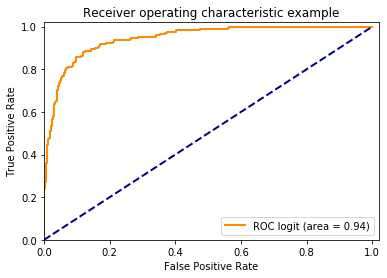

In [123]:
logitMetrics(x_test,y_test,logitcv_f1)

In [166]:
Logit Train Accuracy : 0.925
Logit Train Precision: 0.949 (no fraud) and 0.694 (fraud)
Logit Train Recall   : 0.977 (no fraud) and 0.497 (fraud)
Logit Train F1 Score : 0.963 (no fraud) and 0.579 (fraud

array([[1533,  102],
       [  43,  126]])

In [169]:
126+43

169

In [168]:
1804*0.09

162.35999999999999

## SMOTE

Synthetic Minority Oversampling Technique

### Pros
- problem with imbalanced classification is there are too few examples of the minority class for a model to effectively learn the decision boundary.
- we can oversample the minority to counterbalance this. 
    - we can duplicate examples from minority class prior to fitting the model
    - this balances the class distribution but does not provide any additional information to the model. 
    

### Cons
- Synthetic examples created without considering majority class - resulting in ambiguous examples if there is strong overlap for the classes. 
    - In our case, at least for small providers, theres lots of overlap in the featurespace wrt number of patients, number of claims, etc. 
### Concerns:
- Given that our target is not actual fraud but a potential fraud do we want confidence intervals / prediction intervals?
- would an oversampling technique such as this diminish that?


## Applying SMOTE to LogReg

Counter({0: 4904, 1: 506})
Counter({0: 2101, 1: 1471})


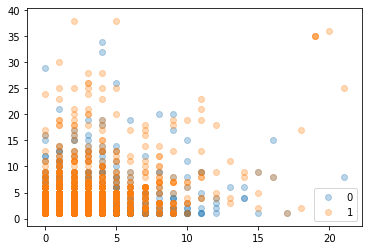

In [173]:
import imblearn
from collections import Counter
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report

counter = Counter(y)
print(counter)
# define pipeline
over = BorderlineSMOTE(sampling_strategy=0.3)
under = RandomUnderSampler(sampling_strategy=0.7)
steps = [('o', over),('u', under)]
pipeline = Pipeline(steps = steps)
# transform the dataset
xs,ys = pipeline.fit_resample(x,y)
# summarize new class distribution
counters = Counter(ys)
print(counters)
# scatter plot of examples by class label

for label, _ in counters.items():
    row_ix = np.where(ys==label)[0]
    ax1 = plt.scatter(xs.loc[row_ix, 'docNet_max'], xs.loc[row_ix,'State'], label=str(label), alpha=0.3)
    
plt.legend()
plt.show()

 Logit Train Accuracy : 0.927
 Logit Train Precision: 0.948 (no fraud) and 0.752 (fraud)
 Logit Train Recall   : 0.984 (no fraud) and 0.478 (fraud)
 Logit Train F1 Score : 0.966 (no fraud) and 0.584 (fraud)


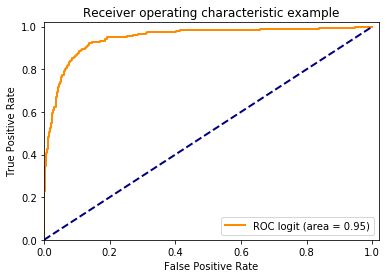

 Logit Train Accuracy : 0.922
 Logit Train Precision: 0.949 (no fraud) and 0.694 (fraud)
 Logit Train Recall   : 0.977 (no fraud) and 0.497 (fraud)
 Logit Train F1 Score : 0.963 (no fraud) and 0.579 (fraud)


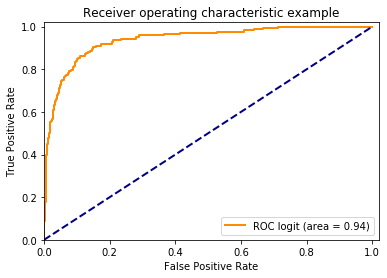

In [193]:
import imblearn
from collections import Counter
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split as tts

cv = RepeatedStratifiedKFold(n_splits = 10,
                             n_repeats = 2,
                             random_state = 1)


logitcv_f1 = linear_model.LogisticRegressionCV(Cs = 20, # grid regularization
                                               penalty='l2',
                                               scoring = 'f1_weighted',
                                               cv = cv,
                                               solver = 'liblinear',
                                               max_iter=1e5)

# define pipeline
over = SMOTE(sampling_strategy=0.2)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', logitcv_f1)]
pipeline = Pipeline(steps=steps)

x_train, x_test, y_train, y_test = tts(x,y,
                                       test_size=1.0/3, 
                                       random_state=0)

pipeline.fit(x_train,y_train)

logitMetrics(x_train,y_train, pipeline)

logitMetrics(x_test,y_test, pipeline)

In [192]:
dir(pipeline)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_fit_params',
 '_check_n_features',
 '_estimator_type',
 '_final_estimator',
 '_fit',
 '_get_param_names',
 '_get_params',
 '_get_tags',
 '_inverse_transform',
 '_iter',
 '_log_message',
 '_more_tags',
 '_pairwise',
 '_replace_estimator',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_set_params',
 '_sk_visual_block_',
 '_transform',
 '_validate_data',
 '_validate_names',
 '_validate_steps',
 'classes_',
 'decision_function',
 'fit',
 'fit_predict',
 'fit_re

In [ ]:
import imblearn
print(imblearn.__version__)

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
X,y = make_classification(n_samples=10000, n_features=2, 
                          n_redundant=0, n_clusters_per_class=1, 
                          weights=[0.99], flip_y=0, random_state=1)

In [ ]:
from collections import Counter
counter = Counter(y)

In [ ]:
counter

In [ ]:
for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix,0], X[row_ix,1], label=str(label))
plt.legend()
plt.show()

In [ ]:

from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X,y)

for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix,0], X[row_ix,1], label=str(label))
plt.legend()
plt.show()



In [ ]:
Counter(y)

Shows creation of more observations of the minority class along the lines in feature space of the minority class

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 100})


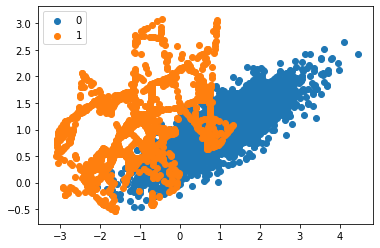

In [99]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

X,y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                          n_clusters_per_class=1, weights=[0.99], 
                          flip_y=0, random_state=1)

counter = Counter(y)
print(counter)
# define pipeline
over = SMOTE(sampling_strategy=0.2)
under = RandomUnderSampler(sampling_strategy=0.6)
steps = [('o', over),('u', under)]
pipeline = Pipeline(steps = steps)
# transform the dataset
Xs,ys = pipeline.fit_resample(X,y)
# summarize new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = np.where(ys==label)[0]
    plt.scatter(Xs[row_ix, 0], Xs[row_ix,1], label=str(label))
plt.legend()
plt.show()



## Applying SMOTE to Logistic Regression

In [ ]:

# define dataset
X, y = make_classification(n_samples=10000, n_features=2, 
                           n_redundant=0,n_clusters_per_class=1, 
                           weights=[0.99], flip_y=0, random_state=1)

# define model: Unpenalized Logistic Regression
model = linear_model.LogisticRegression(solver='liblinear', C=1)
# evaluate pipeline
cv = ms.RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#scores = ms.cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
#f1_scores = ms.cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)
#print('Mean ROC AUC: %.3f' % np.mean(scores))
#print('Mean F1: %.3f' % mean(f1_scores))

In [ ]:

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

In [ ]:
crss

In [ ]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

In [ ]:
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
import time

model_bic = LassoLarsIC(criterion='bic')

In [ ]:
EPSILON = 1e-4

t1 = time.time()
model_bic.fit(X, y)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X, y)
alpha_aic_ = model_aic.alpha_


def plot_ic_criterion(model, name, color):
    criterion_ = model.criterion_
    plt.semilogx(model.alphas_ + EPSILON, criterion_, '--', color=color,
                 linewidth=3, label='%s criterion' % name)
    plt.axvline(model.alpha_ + EPSILON, color=color, linewidth=3,
                label='alpha: %s estimate' % name)
    plt.xlabel(r'$\alpha$')
    plt.ylabel('criterion')


plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'b')
plot_ic_criterion(model_bic, 'BIC', 'r')
plt.legend()
plt.title('Information-criterion for model selection (training time %.3fs)'
          % t_bic)

# #############################################################################
# LassoCV: coordinate descent

# Compute paths
print("Computing regularization path using the coordinate descent lasso...")
t1 = time.time()
model = linear_model.LogisticRegressionCV(penalty='l1', 
                                            scoring = 'f1_macro',
                                            solver = 'liblinear').fit(X,y)
t_lasso_cv = time.time() - t1

# Display results
plt.figure()
ymin, ymax = 2300, 3800
plt.semilogx(model.alphas_ + EPSILON, model.mse_path_, ':')
plt.plot(model.alphas_ + EPSILON, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(model.alpha_ + EPSILON, linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel(r'$\alpha$')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent '
          '(train time: %.2fs)' % t_lasso_cv)
plt.axis('tight')
plt.ylim(ymin, ymax)

plt.show()

In [ ]:
data.groupby('BeneID')['Provider'].nunique()

In [ ]:
physData = data[['AttendingPhysician','OperatingPhysician','OtherPhysician','Provider','State','PotentialFraud']]
physMelt = physData.melt(id_vars=['Provider','State','PotentialFraud'],var_name='Type', value_name='Doctor').dropna(axis=0).drop_duplicates()
physNet = physMelt.groupby(['Doctor','PotentialFraud'])['Provider'].nunique().reset_index()

In [ ]:
fraudCount = physNet.groupby(['Provider','PotentialFraud'])['Doctor'].count().reset_index()

In [ ]:
import numpy as np
fraudCount['logCount'] = np.log(fraudCount.Doctor+1)

In [ ]:
plt.figure(figsize=(12,6))


ax2 = sns.barplot(x = 'Provider',y = 'Doctor', hue = 'PotentialFraud', data = fraudCount)
ax2.set(xlabel='# Providers', ylabel = 'Log Count of Doctors')
plt.tight_layout()
ax2.set(yscale="log")
plt.annotate('Shows log count of \ndoctors listed on claims for \nmultiple providers\n by fraud flags', (4.6, 2000.5))

ax2.figure.savefig("./visualizations/plots/numProviders.png",bbox_inches='tight')

In [ ]:
physNet.groupby('State').count()

In [ ]:
beneData = data[['BeneID','Provider','PotentialFraud']]
beneNet = beneData.groupby(['BeneID','PotentialFraud'])['Provider'].nunique().reset_index()

In [ ]:
d = data.groupby(['Age','PotentialFraud'])['Provider'].nunique().reset_index()
pivoted = d.pivot_table(values='Provider', index = 'Age', columns='PotentialFraud')
# ax1 = sns.lineplot(x = 'Age', y = 'Provider', hue = 'PotentialFraud', data = d)
# ax1.set(yscale="log")

In [ ]:
pivot_scale = (pivoted[['?','No','Yes']] - pivoted.mean(axis=0))/pivoted.std(axis=0)

In [ ]:
pivot_scale = pivot_scale.reset_index()

In [ ]:
pivot_scale = pivot_scale.melt(id_vars = 'Age')

In [ ]:
def plot_count_across_fraud(data, feature, plotType = 'line'):
    d = data.groupby([feature,'PotentialFraud'])['Provider'].nunique().reset_index()
    pivoted = d.pivot_table(values='Provider', index = feature, columns='PotentialFraud')
    pivot_scale = (pivoted[['?','No','Yes']] - pivoted.mean(axis=0))/pivoted.std(axis=0)
    pivot_scale = pivot_scale.reset_index()
    d_scaled = pivot_scale.melt(id_vars = feature)
    
    if plotType == 'line':
        ax1 = sns.lineplot(x = feature, hue = 'PotentialFraud', y = 'value', data=d_scaled)
    elif plotType == 'scatter':
        ax1 = sns.scatterplot(x = feature, hue = 'PotentialFraud', y = 'value', data=d_scaled)
    ax1.set(title='Standardized Number of Providers\n that filed Claims matching this Feature')
    plt.tight_layout()
    return



In [ ]:
plot_count_across_fraud(data, 'Age')


In [ ]:
d = data.groupby(['Age','PotentialFraud'])['ClaimID'].count().reset_index()
pivoted = d.pivot_table(values='ClaimID', index = 'Age', columns='PotentialFraud')
pivot_scale = (pivoted[['?','No','Yes']] - pivoted.mean(axis=0))/pivoted.std(axis=0)
pivot_scale = pivot_scale.reset_index()
d_scaled = pivot_scale.melt(id_vars = 'Age')

In [ ]:
data.columns

In [ ]:
def reg_proc(feature):
    regressor = linear_model.LogisticRegression()
    regressor.fit(X, y)

    y_pred = regressor.predict(X)        
    return(y_pred)

pred_df = pd.DataFrame({lab: reg_proc(lab) for lab in countries.columns}, 
                       columns = countries.columns)

In [ ]:

ax1 = sns.lineplot(x = 'Age', hue = 'PotentialFraud', y = 'value', data=pivot_scale)

#ax1.set(xlabel='# Providers', ylabel='Log Count of Patients')

#plt.annotate('Shows log count of patients that are on claims filed at \nmultiple providers by fraud flags', (8.6, 10005))

#plt.tight_layout()
#ax1.figure.savefig("./visualizations/plots/multiProvider-Bene.png",bbox_inches='tight')

In [ ]:
data.groupby(['Status','WhetherDead'])['BeneID'].count().reset_index()

In [ ]:
print(379/(379+49646))
print(4792/(4792+638786))


In [ ]:
data.groupby(['Status','PotentialFraud'])['ClaimID'].count().reset_index().head(20)

In [ ]:
physData = data[['AttendingPhysician','OperatingPhysician','OtherPhysician','State','County']]
physMelt = physData.melt(id_vars=['State','County'],var_name='Type', value_name='Doctor').dropna(axis=0)
physNet = physMelt.groupby(['Doctor','State'])['County'].nunique().reset_index()

plt.figure(figsize=(12,6))

for state in physNet.State.unique():
    filename = "./visualizations/plots/crossing_county/Doctors/State_" + str(state) + ".png"
    ax1 = sns.countplot(x = 'County', data=physNet[physNet.State==state], palette = 'muted');
    ax1.set(xlabel='Number of Counties Doctors Operate in for State ' + str(state), 
            ylabel='Count of Doctors');
    ax1.figure.savefig(filename,bbox_inches='tight')

In [ ]:
beneData = data[['BeneID','Provider','State','County']]
beneNet = beneData.groupby(['BeneID','Provider'])['County'].nunique().reset_index()

plt.figure(figsize=(12,6))


ax1 = sns.countplot(x = 'County', data=beneNet, palette = 'muted')

ax1.set(xlabel='Number of Counties', ylabel='Number of Doctors')

#ax1.figure.savefig("./visualizations/plots/multistateDoctors.png",bbox_inches='tight')

In [ ]:
target.copy(deep=True)

In [ ]:
data.groupby('Provider')['State'].nunique().to_dict()

In [ ]:
plt.figure(figsize=(6,8))

ax1 = plt.subplot(311)

ax1 = sns.distplot(a = numClaims[numClaims.PotentialFraud=='?']['ClaimID'], kde=False)
ax1.set(yscale="log")
ax1.set(xlabel='Number of Claims')
plt.tight_layout()
plt.xlim(0,9000)
plt.annotate('Fraud: ?', (1000.6, 105))


ax2 = plt.subplot(312)
ax2 = sns.distplot(a = numClaims[numClaims.PotentialFraud=='Yes']['ClaimID'], kde=False)
ax2.set(yscale="log")
ax2.set(xlabel='Number of Claims')
plt.tight_layout()
plt.xlim(0,9000)
plt.annotate('Fraud: Yes', (1000.6, 105))

ax3 = plt.subplot(313)
ax3 = sns.distplot(a = numClaims[numClaims.PotentialFraud=='No']['ClaimID'], kde=False)
ax3.set(yscale="log")
ax3.set(xlabel='Number of Claims')
plt.tight_layout()
plt.xlim(0,9000)
plt.annotate('Fraud: No', (1000.6, 105))

In [ ]:
provData = data[['Provider','PotentialFraud','State','County']]
provNet = provData.groupby(['Provider','PotentialFraud'])['State'].nunique().reset_index()

plt.figure(figsize=(12,6))


ax1 = sns.countplot(x = 'State', hue = 'PotentialFraud', data=provNet, palette = 'muted')

ax1.set(xlabel='Number of States', ylabel='Number of Providers operating')
ax1.set(yscale="log")
ax1.figure.savefig("./visualizations/plots/multistateProviders.png",bbox_inches='tight')

In [ ]:
provData = data[['Provider','State','County']]
provNet = provData.groupby(['Provider','State'])['County'].nunique().reset_index().drop_duplicates()

plt.figure(figsize=(12,6))

for state in provNet.State.unique():
    filename = "./visualizations/plots/crossing_county/Providers/State_" + str(state) + ".png"
    ax1 = sns.countplot(x = 'County', data=provNet[provNet.State==state], palette = 'muted');
    ax1.set(xlabel='Number of Counties Providers Operate in for State ' + str(state), 
            ylabel='Count of Providers');
    ax1.figure.savefig(filename,bbox_inches='tight')

In [ ]:
physData = data[['AttendingPhysician','OperatingPhysician','OtherPhysician','Provider']]
physMelt = physData.melt(id_vars=['State','County'],var_name='Type', value_name='Doctor').dropna(axis=0)
physNet = physMelt.groupby(['State','County'])['Doctor'].nunique().reset_index()


In [ ]:
d = data.melt(id_vars = 'Provider', value_vars = ['AttendingPhysician',
                     'OperatingPhysician',
                     'OtherPhysician'], var_name='Type', value_name='Doctor').dropna(axis=0)
d = d[['Provider','Doctor']].drop_duplicates()

In [ ]:
provData['numDocs'] = d.groupby('Provider')['Doctor'].count().values

In [ ]:
provData = data.groupby('Provider').agg({'BeneID':'nunique',
                              'ClaimID' : 'count',
                              'State' : 'nunique'}).reset_index()

In [ ]:
data.groupby('Provider').agg({'NumDiag':['min','max']}).reset_index()

In [ ]:
california = physNet[physNet.State==5]

In [ ]:
sns.scatterplot(x = 'Doctor', y = 'County',data = california)

In [ ]:
for state in physNet.State.unique():
    filename = "./visualizations/plots/num_doctors/State_" + str(state) + ".png"
    ax1 = sns.countplot(x = 'County', data=physNet[physNet.State==state], palette = 'muted');
    ax1.set(xlabel='Number of Doctors' + str(state), 
            ylabel='Count of Doctors');
    ax1.figure.savefig(filename,bbox_inches='tight')

In [ ]:
data.WhetherDead.value_counts()

In [ ]:
5171/(5171+688432)*100


In [ ]:
p = pd.read_csv('./data/provData.csv')

In [ ]:
import os
try:
    os.mkdir('./b')
except:
    pass

In [ ]:
provData = data.groupby(['Provider','Set']).agg({
		'BeneID':'nunique',
		'ClaimID' : 'count',
		'State' : 'nunique',
		}).reset_index()

In [ ]:
d = data.groupby(['Provider','Status']).agg({'ClaimID': 'count',
                                             'BeneID' : 'nunique'}).reset_index().pivot_table(values=['ClaimID','BeneID'], index = 'Provider', columns='Status').fillna(0)

In [ ]:
d = d.reset_index()
d.columns = d.columns.map(''.join)
d

In [ ]:
provData.merge(target, on = ['Provider','Set'], how = 'left')

In [ ]:
target_train = pd.read_csv('./data/Train.csv')



In [ ]:
target_train

In [ ]:
import pandas as pd
x_train = pd.read_csv('./data/provData/x_train_inout.csv')
x_test = pd.read_csv('./data/provData/x_test_inout.csv')

In [ ]:
x_train[['NumProc_in','NumProc_out','NumProc_in_Range','NumProc_out_Range']]

In [ ]:
cols = x_train.columns.tolist()
cols = cols[-1:] + cols[:-1]

In [ ]:
x_train = x_train[cols] 

In [ ]:
x_train

In [ ]:
plt.scatter(x['BeneID'], x['BeneID_in']+x['BeneID_out'])

In [ ]:
d

In [ ]:
data.columns

In [ ]:

def rangeFunc(feature):
    return max(feature) - min(feature)
p_range = data.groupby(['Provider','Set','Status']).agg({
		'NumProc': rangeFunc,
		'NumDiag' : rangeFunc,
		'NumChronics': rangeFunc,
		'InscClaimAmtReimbursed' : rangeFunc,
		'ClaimDays' : rangeFunc
		}).reset_index().pivot_table(
		values=['NumProc','NumDiag','NumChronics','InscClaimAmtReimbursed','ClaimDays'], 
		index = ['Provider','Set'], 
		columns=['Status']).fillna(0)

In [ ]:
p_range

In [ ]:
p_range = p_range.reset_index()
p_range.columns = p_range.columns.map('_'.join)
p_range.columns += '_Range'


In [ ]:
def rangeFunc(feature):
    return max(feature) - min(feature)

    ## Number of Unique Inpatients and Outpatients
p = data.groupby(['Provider','Status']).agg({
    'Age': 'mean',
    'Gender' : 'mean', # proportion of claims involving males (Gender=1) (not unique to Beneificiaries)
    'BeneID':'nunique',
    'ClaimID' : 'count',
    'State' : 'nunique',
    'AttendingPhysician': 'nunique',
    'OperatingPhysician': 'nunique',
    'OtherPhysician': 'nunique',
    'NumProc': 'mean',
    'NumDiag' : 'mean',
    'NumChronics': 'mean',
    'InscClaimAmtReimbursed' : 'mean',
    'DeductibleAmtPaid' : 'mean',
    'ClaimDays' : 'mean',
    'AdmissionDays' : 'mean',
    'WhetherDead': 'mean', # proportion of dead patients (might need to take negative log to get anything large)
    'Alzheimer' : 'mean',
    'HeartFailure': 'mean', 
    'KidneyDisease' : 'mean',
    'Cancer': 'mean', 
    'ObstrPulmonary': 'mean',
    'Depression': 'mean', 
    'Diabetes': 'mean', 
    'IschemicHeart': 'mean', 
    'Osteoporasis': 'mean',
    'RheumatoidArthritis': 'mean',
     'Stroke': 'mean'}).reset_index().pivot_table(
    values=['Age','Gender','BeneID','ClaimID','State',
    'AttendingPhysician',
    'OperatingPhysician',
    'OtherPhysician',
    'NumProc',
    'NumDiag', 
    'NumChronics',
    'InscClaimAmtReimbursed', 
    'DeductibleAmtPaid', 
    'ClaimDays',
    'AdmissionDays', 
    'WhetherDead', 'Alzheimer',
    'HeartFailure',
    'KidneyDisease',
    'Cancer',
    'ObstrPulmonary',
    'Depression', 
    'Diabetes',
    'IschemicHeart',
    'Osteoporasis',
    'RheumatoidArthritis',
     'Stroke'], 
    index = 'Provider', 
    columns='Status').fillna(0)

p = p.reset_index()
p.columns = p.columns.map('_'.join)

#p = pd.merge(p,d, left_on = ['Provider'], right_on = ['Provider_'], how='left')




#p['logClaim'] = np.log(p['ClaimID'])
#p['logBene'] = np.log(p['BeneID'])

#####
# Create ranges 

p_range = data.groupby(['Provider','Set','Status']).agg({
        'NumProc': rangeFunc,
        'NumDiag' : rangeFunc,
        'NumChronics': rangeFunc,
        'InscClaimAmtReimbursed' : rangeFunc,
        'ClaimDays' : rangeFunc
        }).reset_index().pivot_table(
        values=['NumProc','NumDiag','NumChronics','InscClaimAmtReimbursed','ClaimDays'], 
        index = ['Provider','Set'], 
        columns=['Status']).fillna(0)

p_range = p_range.reset_index()
p_range.columns = p_range.columns.map('_'.join)
p_range.columns += '_Range'


## No need to merge on Provider AND Set since Provider can only be in either Train or Test
p = pd.merge(p,p_range, left_on = ['Provider_'], right_on = ['Provider__Range'], how='left')


In [ ]:
p

In [ ]:
prodoc = pd.read_csv('./data/prodocNet.csv')
propat = pd.read_csv('./data/propatNet.csv')

In [ ]:
prodoc.columns = ['Provider','docNet_max','docNet_min','docNet_mean']
propat.columns = ['Provider','patNet_max','patNet_min','patNet_mean']

In [ ]:
#data.reset_index(inplace=True)
data = data.merge(propat, on='Provider', how='left')
data = data.merge(prodoc, on='Provider', how='left')


In [ ]:
netData = data[['Provider','docNet_max','docNet_min','docNet_mean',
                'patNet_max','patNet_min','patNet_mean']]

In [ ]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(propat.set_index('Provider'))

In [ ]:
sns.pairplot(prodoc.set_index('Provider'))

In [ ]:
data.columns